In [38]:
## exercise 2.6 ### 
import numpy as np
import matplotlib.pyplot as plt 

###
# Exercise 2.5 (programming) Design and conduct an experiment to demonstrate the
# diculties that sample-average methods have for nonstationary problems. Use a modified
# version of the 10-armed testbed in which all the q⇤(a) start out equal and then take
# independent random walks (say by adding a normally distributed increment with mean
# zero and standard deviation 0.01 to all the q⇤(a) on each step). Prepare plots like
# Figure 2.2 for an action-value method using sample averages, incrementally computed,
# and another action-value method using a constant step-size parameter, ↵ = 0.1. Use
# " = 0.1 and longer runs, say of 10,000 steps.
###


In [94]:
k = 10
mean = 0
sd = 0.01
epsilon = 0.1
runs = 2000
steps = 10000
alpha = 0.1

def select_e_greedy_action(Q,epsilon=epsilon):
    return np.random.randint(0,len(Q)) if np.random.uniform(0,1) <= epsilon else np.argmax(Q,axis=0)
    
def run_k_bandit_problem(method,steps=steps,k=k,mean=mean,sd=sd,alpha=alpha):
    reward = [0]
    Q = k*[0]
    qStar = k*[0]
    N = k*[0]
    for step in range(1,steps+1):
        action = select_e_greedy_action(Q)
        N[action] += 1
        reward.append(qStar[action])
        Q[action] += (1/N[action])*(qStar[action] - Q[action]) if method == 'sample_avg' else (alpha)*(qStar[action] - Q[action])
        qStar += np.random.normal(mean,sd,len(qStar))
    return reward


def run_trials(runs=runs,eps=epsilon,alpha=alpha):
    sample_avg_rwd = [run_k_bandit_problem('sample_avg') for i in range(runs)]
    weighted_avg_rwd = [run_k_bandit_problem('weighted_avg') for i in range(runs)]
    compiled_sample_avg = np.average(sample_avg_rwd,axis=0)
    compiled_weighted_avg = np.average(weighted_avg_rwd,axis=0)
    plt.plot(compiled_sample_avg,label=f'eps={eps}')
    plt.plot(compiled_weighted_avg,label=f"eps = {eps}, alpha = {alpha}")
    plt.legend()
    plt.ylabel('average reward')
    plt.xlabel('num steps')
    plt.show()
    
    
    

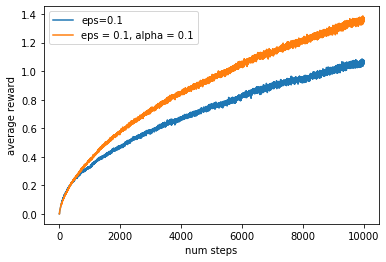

In [95]:
run_trials()